In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [4]:
# Preprocessing
num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 25s 19ms/step - loss: 0.7773 - accuracy: 0.7593 - val_loss: 0.0832 - val_accuracy: 0.9748
Epoch 2/15
422/422 [==============================] - 7s 16ms/step - loss: 0.1294 - accuracy: 0.9605 - val_loss: 0.0579 - val_accuracy: 0.9853
Epoch 3/15
422/422 [==============================] - 6s 15ms/step - loss: 0.0885 - accuracy: 0.9733 - val_loss: 0.0449 - val_accuracy: 0.9888
Epoch 4/15
422/422 [==============================] - 6s 15ms/step - loss: 0.0702 - accuracy: 0.9778 - val_loss: 0.0394 - val_accuracy: 0.9893
Epoch 5/15
422/422 [==============================] - 6s 15ms/step - loss: 0.0615 - accuracy: 0.9794 - val_loss: 0.0403 - val_accuracy: 0.9890
Epoch 6/15
422/422 [==============================] - 6s 15ms/step - loss: 0.0590 - accuracy: 0.9822 - val_loss: 0.0355 - val_accuracy: 0.9898
Epoch 7/15
422/422 [==============================] - 6s 15ms/step - loss: 0.0511 - accuracy: 0.9832 - val_loss: 0.0357 - val_accuracy: 0.990

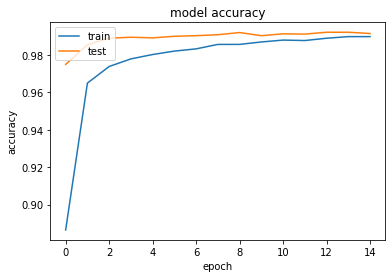

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

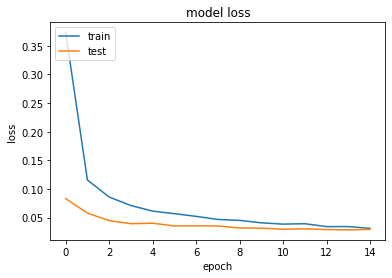

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02499513328075409
Test accuracy: 0.9914000034332275


In [10]:
model.save('models/cnn')

INFO:tensorflow:Assets written to: models/cnn\assets


In [11]:
model = tf.keras.models.load_model('models/cnn')

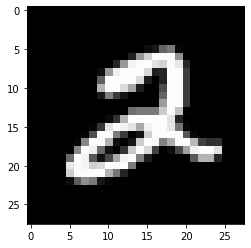

In [13]:
plt.imshow(x_train[5].reshape(28,28), cmap='gray')
plt.show()

In [14]:
model.predict(np.asarray([x_train[5]]))[0]

array([9.13629589e-12, 3.03869668e-12, 9.99999881e-01, 6.14145250e-08,
       2.64785444e-10, 2.13407070e-12, 4.15032930e-14, 7.48434578e-11,
       5.18501437e-08, 1.26836675e-11], dtype=float32)

In [15]:
model.predict(np.asarray([x_train[5]]))[0].argmax()

2